# DTA predict EDA and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import deepchem as dc
from ydata_profiling import ProfileReport
from rdkit import Chem
from rdkit.Chem import AllChem, Draw


## Loading KIBA dataset and inspecting firsts and last rows

In [4]:
df = pd.read_csv('kiba.txt', sep=" ")
df.columns = ['Drug_ID', 'Protein_ID', 'SMILES_sequence', 'Protein_sequence', 'Affinity_score']
print(df.head())


         Drug_ID Protein_ID                                SMILES_sequence  \
0  CHEMBL1087421     O14920  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
1  CHEMBL1087421     O15111  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
2  CHEMBL1087421     P00533  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
3  CHEMBL1087421     P04626  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
4  CHEMBL1087421     P06239  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   

                                    Protein_sequence  Affinity_score  
0  MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...            11.1  
1  MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...            11.1  
2  MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...            11.1  
3  MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...            11.1  
4  MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...            11.1  


In [31]:
print(df.tail())

             Drug_ID Protein_ID  \
118248  CHEMBL230654     Q13554   
118249  CHEMBL230654     Q13555   
118250  CHEMBL230654     Q13557   
118251  CHEMBL230654     Q16539   
118252  CHEMBL230654     Q9UQM7   

                                          SMILES_sequence  \
118248  CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...   
118249  CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...   
118250  CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...   
118251  CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...   
118252  CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...   

                                         Protein_sequence  Affinity_score  
118248  MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...        10.49794  
118249  MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...        10.49794  
118250  MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...        10.49794  
118251  MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...        10.49794  
118252  MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVL

## Generating descriptive statistics

In [23]:
print(df.shape)
df.info()

(118253, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118253 entries, 0 to 118252
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Drug_ID           118253 non-null  object 
 1   Protein_ID        118253 non-null  object 
 2   SMILES_sequence   118253 non-null  object 
 3   Protein_sequence  118253 non-null  object 
 4   Affinity_score    118253 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.5+ MB


In [33]:
df.describe()

,Affinity_score
count,118253.000000
mean,11.719940
std,0.836948
min,0.000000
25%,11.200000
50%,11.500000
75%,11.923909
max,17.200179


## Checking for missing values

Missing values per row
Drug_ID             False
Protein_ID          False
SMILES_sequence     False
Protein_sequence    False
Affinity_score      False
dtype: bool


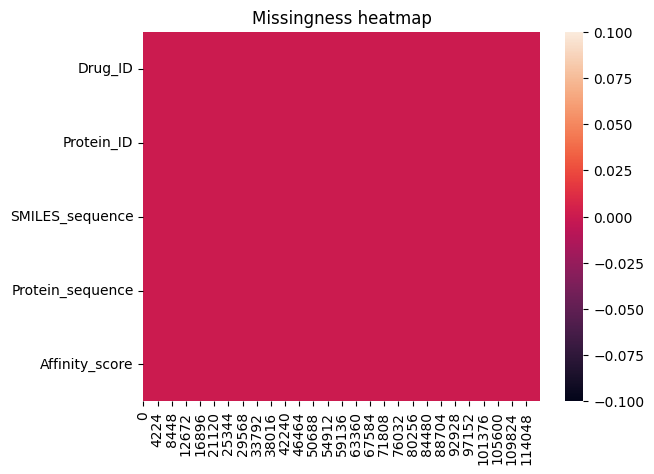

In [16]:
print('Missing values per row')
print(df.isna().any())
sns.heatmap(df.isna().transpose())
plt.title('Missingness heatmap')
plt.show()


### No missing values were detected

## Visualizing KIBA affinity score distribution

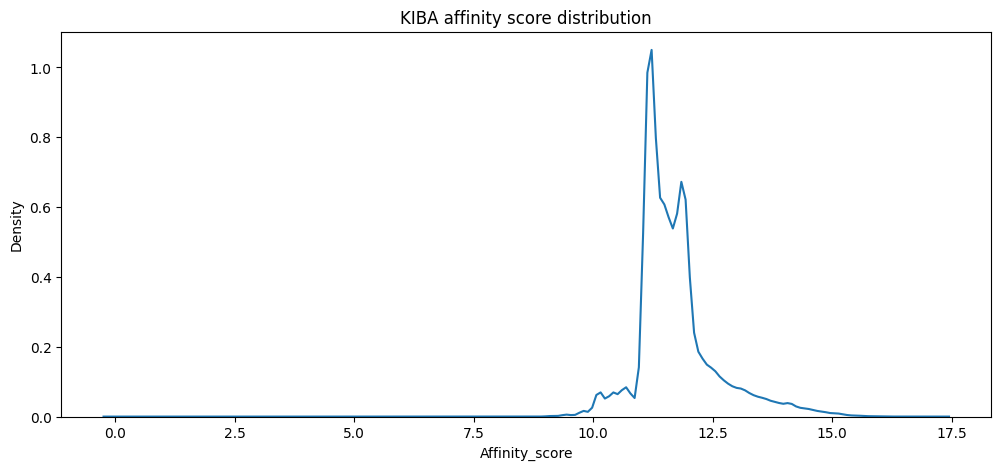

In [7]:
plt.figure(figsize=(12, 5))
plot = sns.kdeplot(data=df, x='Affinity_score')
plt.title("KIBA affinity score distribution")
plt.show()

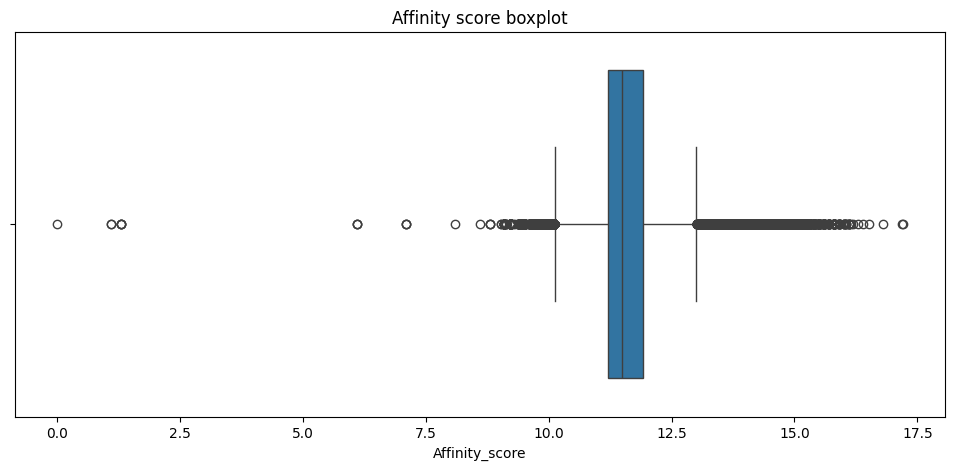

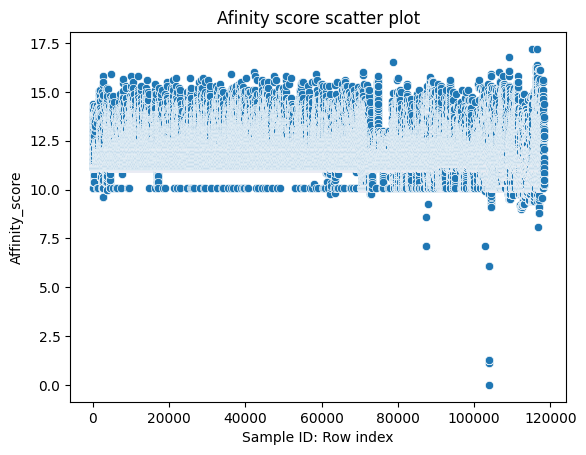

In [8]:
plt.figure(figsize=(12, 5))
plot = sns.boxplot(data=df, x='Affinity_score')
plt.title("Affinity score boxplot")
plt.show()

sns.scatterplot(data=df, x=df.index, y='Affinity_score')
plt.title("Afinity score scatter plot")
plt.xlabel('Sample ID: Row index')
plt.show()

## Filtering outliers and aberrant values

Outlier low treshold: 10.1
Number of low outlier values: 824
Outlier high treshold: 14.600312917
Number of high outlier values: 1032


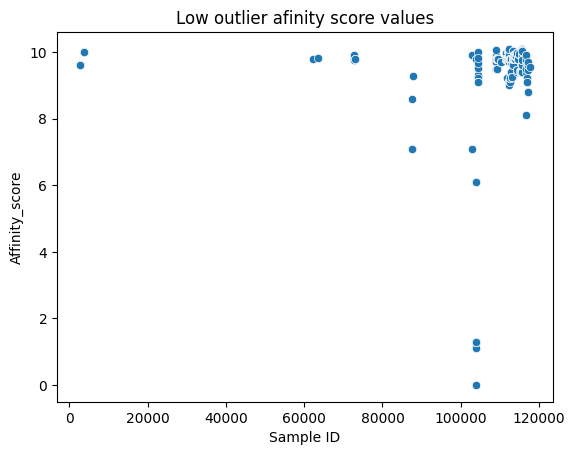

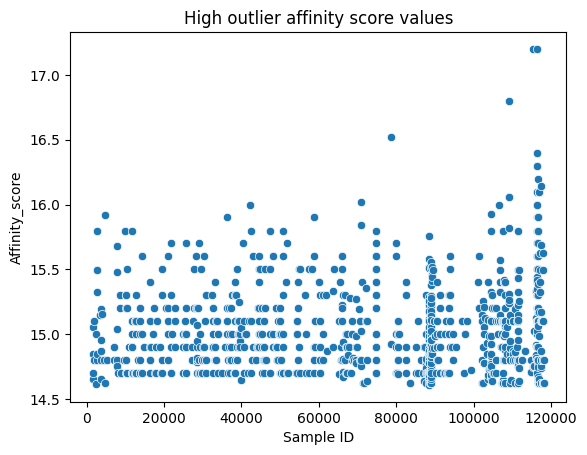

In [11]:
outlier_low = df['Affinity_score'].quantile(0.01)
outlier_high  = df['Affinity_score'].quantile(0.99)

nb_oulier_low = (df['Affinity_score'] < outlier_low).sum()
nb_oulier_high = (df['Affinity_score'] > outlier_high).sum()

print(f'Outlier low treshold: {outlier_low}')
print(f'Number of low outlier values: {nb_oulier_low}')

print(f'Outlier high treshold: {outlier_high}')
print(f'Number of high outlier values: {nb_oulier_high}')

outlier_low_df = df[(df['Affinity_score'] < outlier_low)]
outlier_high_df = df[(df['Affinity_score'] > outlier_high)]

sns.scatterplot(data=outlier_low_df, x=outlier_low_df.index, y='Affinity_score')
plt.title("Low outlier afinity score values")
plt.xlabel('Sample ID')
plt.show()

sns.scatterplot(data=outlier_high_df, x=outlier_high_df.index, y='Affinity_score')
plt.title("High outlier affinity score values")
plt.xlabel('Sample ID')
plt.show()

With the percentile method 1856 values were detetcted as outliers, which represents 1.57% of the dataset.

Number of outliers with tresholds 8 and 16: 30
              Drug_ID Protein_ID  \
103942   CHEMBL373751     P53350   
103938   CHEMBL373751     P00533   
103939   CHEMBL373751     P04626   
103945   CHEMBL373751     Q15759   
103940   CHEMBL373751     P49840   
103941   CHEMBL373751     P49841   
103943   CHEMBL373751     P53779   
103936   CHEMBL373751     O14920   
103937   CHEMBL373751     O15111   
103944   CHEMBL373751     Q14164   
87466    CHEMBL259850     P17252   
87485    CHEMBL259850     P49674   
102782   CHEMBL406845     P43403   
70915   CHEMBL1241676     P12931   
109153   CHEMBL305178     O15264   
109168   CHEMBL305178     P53778   
109175   CHEMBL305178     Q15759   
116944   CHEMBL213618     P22694   
116294  CHEMBL1993996     P17948   
116434   CHEMBL273187     P36888   
116942   CHEMBL213618     P17612   
116943   CHEMBL213618     P22612   
117372   CHEMBL523586     P31749   
116489   CHEMBL374044     P17948   
116270  CHEMBL1986979     P17948   
116419   CHEMBL27

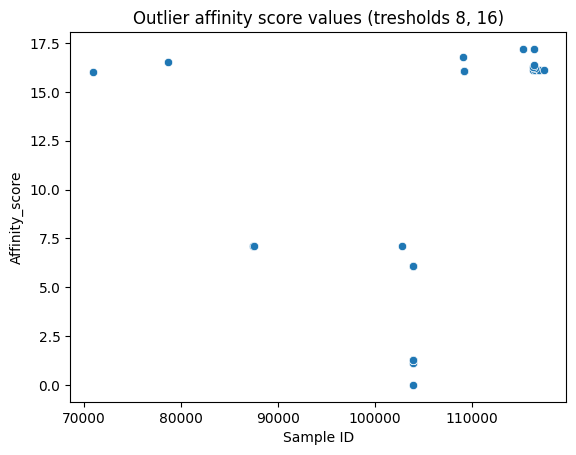

In [12]:
outlier_df = df[(df['Affinity_score'] < 8) | (df['Affinity_score'] > 16)].sort_values(['Affinity_score'])
outlier_df_len = len(outlier_df)
print(f'Number of outliers with tresholds 8 and 16: {outlier_df_len}')
print (outlier_df)

sns.scatterplot(data=outlier_df, x=outlier_df.index, y='Affinity_score')
plt.title("Outlier affinity score values (tresholds 8, 16)")
plt.xlabel('Sample ID')
plt.show()

With tresholds 8 and 16, 30 were detected as outliers, which represents 0.025% of the dataset(with tresholds 8 and 15, 439 values, 0.37% of the dataset).

Filtered Dataframe shape
(118223, 5)


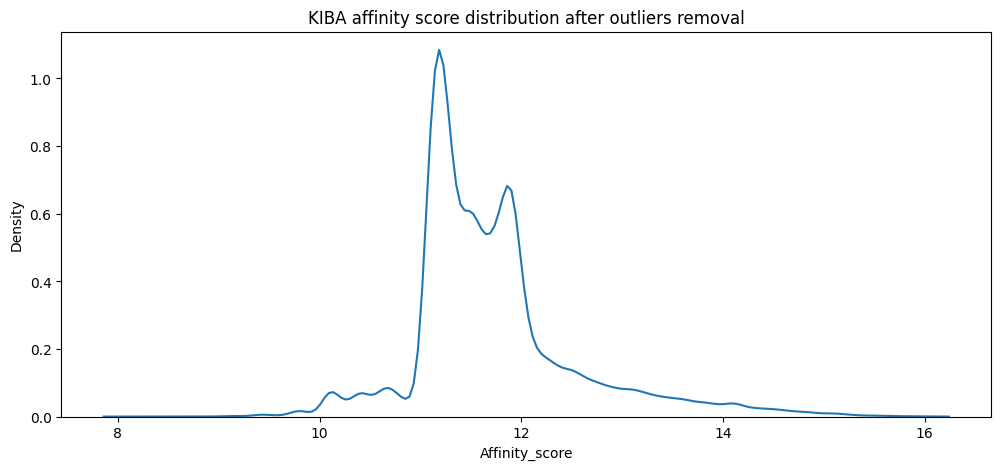

Number of drug target pairs (by smiles sequence) before outlier removal: 117656
Number of drug target pairs (by smiles sequence) after outlier removal: 117626
Number of drug target pairs (by drug id) before outlier removal: 118253
Number of drug target pairs (by drug id) after outlier removal: 118223
         Drug_ID Protein_ID                                SMILES_sequence  \
0  CHEMBL1087421     O14920  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
1  CHEMBL1087421     O15111  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
2  CHEMBL1087421     P00533  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
3  CHEMBL1087421     P04626  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   
4  CHEMBL1087421     P06239  COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl   

                                    Protein_sequence  Affinity_score  
0  MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...            11.1  
1  MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...            11.1  
2  MRPSGTAGAALLA

In [25]:
filtered_df = df[(df['Affinity_score'] > 8) & (df['Affinity_score'] < 16)].copy()
print('Filtered Dataframe shape')
print(filtered_df.shape)

plt.figure(figsize=(12, 5))
plot = sns.kdeplot(data=filtered_df, x='Affinity_score')
plt.title("KIBA affinity score distribution after outliers removal")
plt.show()

nb_groups = df.groupby(['SMILES_sequence', 'Protein_ID']).ngroups
nb_groups_filtered = filtered_df.groupby(['SMILES_sequence', 'Protein_ID']).ngroups

nb_id_groups = df.groupby(['Drug_ID', 'Protein_ID']).ngroups
nb_id_groups_filtered = filtered_df.groupby(['Drug_ID', 'Protein_ID']).ngroups

print(f'Number of drug target pairs (by smiles sequence) before outlier removal: {nb_groups}')
print(f'Number of drug target pairs (by smiles sequence) after outlier removal: {nb_groups_filtered}')

print(f'Number of drug target pairs (by drug id) before outlier removal: {nb_id_groups}')
print(f'Number of drug target pairs (by drug id) after outlier removal: {nb_id_groups_filtered}')

print(filtered_df.head())


30 outliers values were removed based on the kiba affinity score distribution, with tresholds of 8 and 16, reducing the number of drug traget pairs ( by smiles sequences) from 117656 to 117626 pairs, and the number of drug traget pairs ( by drug ID) from 118253 to 118223 pairs. the difference between the number of pairs by smiles seuqnece and by drug ID suggests the presence of duplicated smiles recorded with different drug IDs.

## Checking and handling duplicates

In [14]:

drug_target_by_id = df[['Drug_ID','Protein_ID']].drop_duplicates()
print('Number of drug-target pairs by ID before filtering')
print(len(drug_target_by_id))

drug_target_by_id_filt = filtered_df[['Drug_ID','Protein_ID']].drop_duplicates()
print('Number of drug-target pairs by ID after filtering')
print(len(drug_target_by_id_filt))

drug_target_pairs = df[['SMILES_sequence','Protein_sequence']].drop_duplicates()
print('Number of drug-target pairs by SMILES and protein sequence before filtering')
print(len(drug_target_pairs))

drug_target_pairs_filt = filtered_df[['SMILES_sequence','Protein_sequence']].drop_duplicates()
print('Number of drug-target pairs by SMILES and protein sequence after filtering')
print(len(drug_target_pairs_filt))


Number of drug-target pairs by ID before filtering
118253
Number of drug-target pairs by ID after filtering
118223
Number of drug-target pairs by SMILES and protein sequence before filtering
117656
Number of drug-target pairs by SMILES and protein sequence after filtering
117626


In [18]:
smiles_unique = df['SMILES_sequence'].unique()
print(smiles_unique)
print(len(smiles_unique))

smiles_unique_filt = filtered_df['SMILES_sequence'].unique()
print(len(smiles_unique_filt))

drug_unique = df['Drug_ID'].unique()
print(drug_unique)
print(len(drug_unique))

drug_unique_filt = filtered_df['Drug_ID'].unique()
print(len(drug_unique_filt))



['COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl'
 'COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl'
 'C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4C=CS5)C6=CC(=CC=C6)NC(=O)CC7=CC=CC=C7'
 ... 'CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C'
 'CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCCNC6CCC(CC6)O)C7=C3C(=O)NC7=O'
 'CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)NC4=CC(=C(C=C4)F)Cl)Cl']
2068
2068
['CHEMBL1087421' 'CHEMBL1088633' 'CHEMBL1090360' ... 'CHEMBL408982'
 'CHEMBL307152' 'CHEMBL230654']
2111
2111


In [19]:
aa_seq_unique = df['Protein_sequence'].unique()
print(len(aa_seq_unique))

aa_seq_unique_filt = filtered_df['Protein_sequence'].unique()
print(len(aa_seq_unique_filt))

protein_unique = df['Protein_ID'].unique()
print(protein_unique)
print(len(protein_unique))

protein_unique_filt = filtered_df['Protein_ID'].unique()
print(len(protein_unique_filt))


229
229
['O14920' 'O15111' 'P00533' 'P04626' 'P06239' 'P07333' 'P15056' 'P24941'
 'P28482' 'P45983' 'P45984' 'P49841' 'P53350' 'P53779' 'Q13464' 'Q16539'
 'Q16584' 'O00141' 'O00311' 'O14757' 'O14965' 'O15075' 'O15264' 'O15530'
 'O43293' 'O60674' 'O75116' 'O75582' 'O94806' 'O95819' 'O96013' 'O96017'
 'P04629' 'P05129' 'P06213' 'P06241' 'P06493' 'P07332' 'P07948' 'P07949'
 'P08069' 'P08922' 'P10721' 'P11309' 'P11362' 'P12931' 'P15735' 'P16591'
 'P17612' 'P23443' 'P24723' 'P27448' 'P29317' 'P29597' 'P31751' 'P35916'
 'P35968' 'P41743' 'P42679' 'P42685' 'P43405' 'P48729' 'P48730' 'P49137'
 'P49760' 'P49840' 'P51451' 'P51617' 'P51812' 'P51817' 'P51955' 'P51957'
 'P52333' 'P53778' 'P68400' 'P78368' 'Q00535' 'Q05397' 'Q05513' 'Q05655'
 'Q06418' 'Q08881' 'Q12851' 'Q13131' 'Q13153' 'Q13188' 'Q13237' 'Q13554'
 'Q13555' 'Q13557' 'Q13627' 'Q13976' 'Q14012' 'Q14680' 'Q15303' 'Q16288'
 'Q16513' 'Q16620' 'Q16644' 'Q5VT25' 'Q7KZI7' 'Q7L7X3' 'Q86V86' 'Q8IW41'
 'Q8N4C8' 'Q8NE63' 'Q8TDC3' 'Q96GD4' 'Q96KB

In [20]:
id_by_smiles_count = df.groupby('SMILES_sequence')['Drug_ID'].nunique().reset_index()
duplicated_smiles = id_by_smiles_count[id_by_smiles_count['Drug_ID'] > 1]
print(duplicated_smiles.shape)
print(duplicated_smiles)

id_by_smiles_count_filt = filtered_df.groupby('SMILES_sequence')['Drug_ID'].nunique().reset_index()
duplicated_smiles_filt = id_by_smiles_count_filt[id_by_smiles_count['Drug_ID'] > 1]
print(duplicated_smiles_filt.shape)

(32, 2)
                                        SMILES_sequence  Drug_ID
202   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...        8
205   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...        2
206   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...        6
213   C1=CC2=C(C=CN=C2)C(=C1)S(=O)(=O)NCCNCC=CC3=CC=...        2
374                 C1=CC=C2C(=C1)C(=CC3=CC=CN3)C(=O)N2        2
383   C1=CC=C2C(=C1)C(=CN2)CC(COC3=CN=CC(=C3)C4=CC5=...        2
390   C1=CC=C2C(=C1)C(=CN2)CC(COC3=CN=CC(=C3)C=CC4=C...        2
505   C1C(C(C(OC1N2C3=C(C=CC(=C3)O)C4=C5C(=C6C7=C(C=...        2
566   C1C2C(C3C4C(C5=C(C(=C(C(=C5C(=O)O4)C6=C(C(=C(C...        2
734    C1CNCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC=N3)N        2
750   C1COCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)Cl)O)C(=NC=N3)N        2
751    C1COCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC=N3)N        2
832   CC(C(=O)N)N(C)CC1=C(C=C2C(=C1)C(=NC=N2)NC3=C(C...        2
1083        CC(C1=CC=CC=C1)NC2=C(C(=O)C2=O)NC3=CC=NC=C3        2
1090             

In [14]:
duplicated_smiles_df = df[df['SMILES_sequence'].isin(duplicated_smiles['SMILES_sequence'])]
affinity_scores_count = duplicated_smiles_df.groupby(['SMILES_sequence', 'Protein_ID'])['Affinity_score'].nunique().reset_index()
affinity_scores_count = affinity_scores_count.rename(columns={'Affinity_score': 'Affinity_scores_unique'})
different_scores = affinity_scores_count[affinity_scores_count['Affinity_scores_unique'] > 1]
print(different_scores.shape)
print(different_scores.head())


(288, 3)
                                     SMILES_sequence Protein_ID  \
0  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806   
1  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05129   
2  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05771   
3  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P17252   
4  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P24723   

   Affinity_scores_unique  
0                       7  
1                       7  
2                       7  
3                       7  
4                       7  


In [26]:
id_count = duplicated_smiles_df.groupby('SMILES_sequence')['Drug_ID'].nunique().reset_index().rename(columns={'Drug_ID': 'Number of IDs'})
scores_count = duplicated_smiles_df.groupby('SMILES_sequence')['Affinity_score'].nunique().reset_index().rename(columns={'Affinity_score': 'Number of affinity scores'})
distinct_values_overview = id_count.merge(scores_count, on ='SMILES_sequence')
print(distinct_values_overview.shape)
print(distinct_values_overview)         

(32, 3)
                                      SMILES_sequence  Number of IDs  \
0   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...              8   
1   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...              2   
2   C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...              6   
3   C1=CC2=C(C=CN=C2)C(=C1)S(=O)(=O)NCCNCC=CC3=CC=...              2   
4                 C1=CC=C2C(=C1)C(=CC3=CC=CN3)C(=O)N2              2   
5   C1=CC=C2C(=C1)C(=CN2)CC(COC3=CN=CC(=C3)C4=CC5=...              2   
6   C1=CC=C2C(=C1)C(=CN2)CC(COC3=CN=CC(=C3)C=CC4=C...              2   
7   C1C(C(C(OC1N2C3=C(C=CC(=C3)O)C4=C5C(=C6C7=C(C=...              2   
8   C1C2C(C3C4C(C5=C(C(=C(C(=C5C(=O)O4)C6=C(C(=C(C...              2   
9    C1CNCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC=N3)N              2   
10  C1COCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)Cl)O)C(=NC=N3)N              2   
11   C1COCC1N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC=N3)N              2   
12  CC(C(=O)N)N(C)CC1=C(C=C2C(=C1)C(=NC=N2)NC3=C(C...   

(1600, 4)
                                     SMILES_sequence Protein_ID  \
0  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806   
1  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05129   
2  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05771   
3  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P17252   
4  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P24723   
5  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P41743   
6  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q02156   
7  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q04759   
8  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q05513   
9  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q05655   

   Number_of_IDs  Number_of_affinity_scores  
0              8                          7  
1              8                          7  
2              8                          7  
3              8                          7  
4              8      

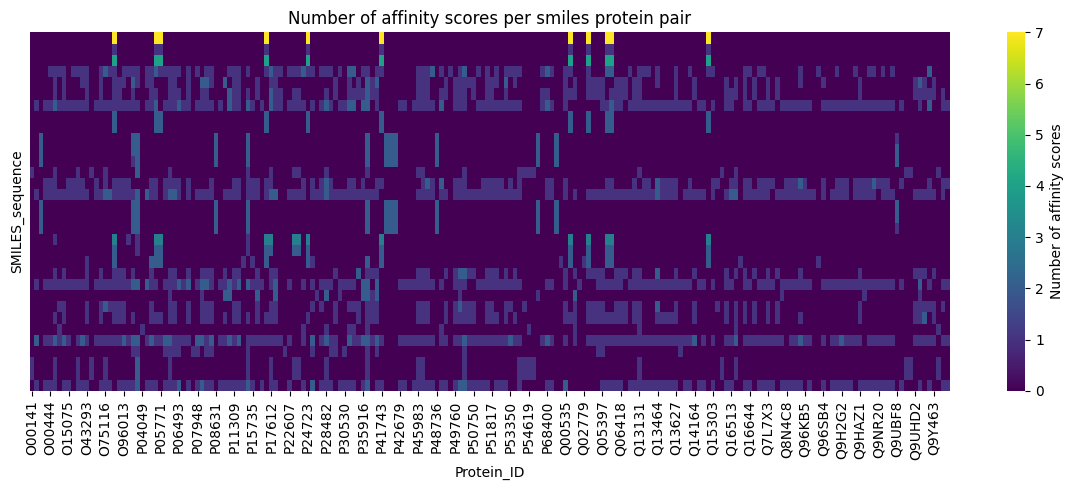

In [34]:
distinct_values_expanded = (
    duplicated_smiles_df
    .groupby(['SMILES_sequence', 'Protein_ID'])
    .agg(
        Number_of_IDs=('Drug_ID', 'nunique'),
        Number_of_affinity_scores=('Affinity_score', 'nunique')
        
    )
    .reset_index()
)

print(distinct_values_expanded.shape)
print(distinct_values_expanded.head(10))

heatmap_matrix = distinct_values_expanded.pivot_table(index='SMILES_sequence', columns='Protein_ID', values='Number_of_affinity_scores', fill_value=0)

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_matrix, cmap='viridis', cbar_kws={'label': 'Number of affinity scores'})
plt.title("Number of affinity scores per smiles protein pair")
plt.xlabel('Protein_ID')
plt.ylabel('SMILES_sequence')
plt.yticks([])
plt.tight_layout()
plt.show()

In [31]:
distinct_values_detailed = (
    duplicated_smiles_df
    .groupby(['SMILES_sequence', 'Protein_ID', 'Drug_ID'])
    .agg(Number_of_affinity_scores=('Affinity_score', 'nunique'))
    .reset_index()
)

print(distinct_values_detailed.shape)
print(distinct_values_detailed.head(10))

(2197, 4)
                                     SMILES_sequence Protein_ID       Drug_ID  \
0  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL112235   
1  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL334869   
2  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL335940   
3  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL336603   
4  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL338966   
5  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL406901   
6  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL434237   
7  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  CHEMBL435191   
8  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05129  CHEMBL112235   
9  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05129  CHEMBL334869   

   Number_of_affinity_scores  
0                          1  
1                          1  
2    

In [36]:
distribution_duplicated_pairs = (
    duplicated_smiles_df
    .groupby(['SMILES_sequence', 'Protein_ID'])['Affinity_score']
    .agg(['mean', 'std', 'min', 'max', 'count'])
    .reset_index()
)

print(distribution_duplicated_pairs.shape)
print(distribution_duplicated_pairs.head(10))

(1600, 7)
                                     SMILES_sequence Protein_ID       mean  \
0  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     O94806  10.343554   
1  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05129  10.343554   
2  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P05771  10.343554   
3  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P17252  10.343554   
4  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P24723  10.343554   
5  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     P41743  10.343554   
6  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q02156  10.343554   
7  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q04759  10.343554   
8  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q05513  10.343554   
9  C1=CC2=C(C=C1O)NC3=C4C(=C5C(=C23)C(=O)N(C5=O)N...     Q05655  10.343554   

       std      min        max  count  
0  0.43191  9.79897  10.869551      8  
1  0.43191  9.79897  10.869551      8  
2  0.43191 

In [31]:
cleaned_df = filtered_df.groupby(['SMILES_sequence', 'Protein_sequence']).agg({'Affinity_score' : 'mean'}).reset_index()

print(cleaned_df.shape)
print(cleaned_df.head())

(117626, 3)
                    SMILES_sequence  \
0  C#CC1=CN(C2=C1C(=NC=N2)N)C3CCCC3   
1  C#CC1=CN(C2=C1C(=NC=N2)N)C3CCCC3   
2  C#CC1=CN(C2=C1C(=NC=N2)N)C3CCCC3   
3  C#CC1=CN(C2=C1C(=NC=N2)N)C3CCCC3   
4  C#CC1=CN(C2=C1C(=NC=N2)N)C3CCCC3   

                                    Protein_sequence  Affinity_score  
0  MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...       11.600000  
1  MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFER...       11.300000  
2  MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...       13.000009  
3  MAKQYDSVECPFCDEVSKYEKLAKIGQGTFGEVFKARHRKTGQKVA...       11.900001  
4  MALDVKSRAKRYEKLDFLGEGQFATVYKARDKNTNQIVAIKKIKLG...       11.900001  


In [35]:

DT_pair_by_smiles = cleaned_df[['SMILES_sequence','Protein_sequence']].drop_duplicates()
print('Number of drug-target pairs by smiles sequence after removing duplicates')
print(len(DT_pair_by_smiles))

smiles_nb = filtered_df['SMILES_sequence'].unique()
print('Number of distinct smiles sequences before removing duplicates')
print(len(smiles_nb))

smiles_nb_cleaned = cleaned_df['SMILES_sequence'].unique()
print('Number of distinct smiles sequences after removing duplicates')
print(len(smiles_nb_cleaned))

protein_nb_cleaned = cleaned_df['Protein_sequence'].unique()
print('Number of distinct protein sequences after removing duplicates')
print(len(protein_nb_cleaned))


check_duplicates_filtered = filtered_df[filtered_df.duplicated(subset=['SMILES_sequence', 'Protein_sequence'], keep=False)]

check_duplicates_cleaned = cleaned_df[cleaned_df.duplicated(subset=['SMILES_sequence', 'Protein_sequence'], keep=False)]

print('Checking for duplicated smiles in the cleaned dataset')

print(f'Number of duplicated smiles-protein sequence pairs before cleaning: {len(check_duplicates_filtered)}')

print(f'Number of duplicated smiles-protein sequence pairs after cleaning: {len(check_duplicates_cleaned)}')

cleaned_df.info()
cleaned_df.describe()


Number of drug-target pairs by smiles sequence after removing duplicates
117626
Number of distinct smiles sequences before removing duplicates
2068
Number of distinct smiles sequences after removing duplicates
2068
Number of distinct protein sequences after removing duplicates
229
Checking for duplicated smiles in the cleaned dataset
Number of duplicated smiles-protein sequence pairs before cleaning: 1070
Number of duplicated smiles-protein sequence pairs after cleaning: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117626 entries, 0 to 117625
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SMILES_sequence   117626 non-null  object 
 1   Protein_sequence  117626 non-null  object 
 2   Affinity_score    117626 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


,Affinity_score
count,117626.000000
mean,11.721668
std,0.827728
min,8.100000
25%,11.200000
50%,11.525969
75%,11.923909
max,15.999629


The count of affinity scores was reduced from 118 253 to 117 626 after removing outliers and duplicated pairs. The mean and standard deviation remained similar (11.71 to 11.72 and 0.83 to 0.82 respectively). The 25th, 50th and 75th percentiles also remained consistent (11.2, 11.5 and 11.9). The main variation regarding the descriptive statistics values are the min and max value due to the removal of outlier values.

The Drug ID column was removed when aggregating the values from different drug IDs refering to the same smiles sequence by computing the mean of affinity scores for each smiles sequence-protein pairs.The protein ID column was also dropped. Those two columns were useful for handling duplicates, but are not useful for the model trainig, since it will be based on smiles and protein sequence representations.


In [37]:
cleaned_df.to_csv("cleaned_kiba_dataset.csv", index=False)

## Visualizing molecules with RDKit and checking for chemically invalid molecules

In [12]:
df['mol_graphs'] = [Chem.MolFromSmiles(molecule) for molecule in df['SMILES_sequence']]
print(df['mol_graphs'].isna().any())

False


No chemically invalid molecules were detected

In [20]:
df['mol_canonical'] = [Chem.MolToSmiles(molecule) for molecule in df['mol_graphs']]
print(df['mol_canonical'].isna().any())
drug_target_canonical = df[['mol_canonical','Protein_sequence']].drop_duplicates()
print(len(drug_target_canonical))


False
117656


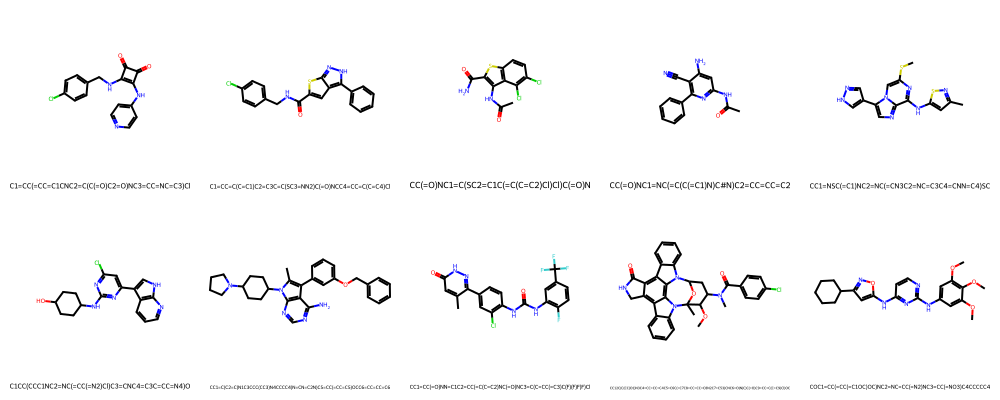

In [13]:
sampled_df = df.sample(10)

mol_grid = Draw.MolsToGridImage(
   [Chem.MolFromSmiles(molecule) for molecule in sampled_df['SMILES_sequence']],
   molsPerRow=5,
   legends=[smiles_seq for smiles_seq in sampled_df['SMILES_sequence']],
   subImgSize=(200,200)
)

mol_grid